## 심전도와 맥파를 이용한 딥러닝 기반 혈압 추정
---

### Code infomation

Created on Sun Aug 25 19:57:14 2019

Author : Kaintels (hanu)

Ver : 1.3.0

Environment : Anaconda 3 and Python 3.7.3 

### 데이터 세트 정보

1. 맥파(PPG) 신호 125Hz
2. 동맥혈압(ABP) 신호 125Hz
3. 심전도(ECG) 신호 125Hz

### 사용가능한 라이브러리

- numpy : 수치 및 행렬 계산을 위한 라이브러리
- matplotlib : 그래프 도식화 라이브러리
- pandas : 데이터 불러오기 및 데이터 처리 라이브러리
- scipy : 수학 및 신호처리 라이브러리
- tensorflow : 딥러닝 라이브러리
- keras : tensorflow의 high-level API

본 실습자료에는 cpu 버전만 사용 (gpu 버전에 비해 느림)

## 파이썬 라이브러리 import 및 예제 데이터 불러오기

---


### 라이브러리 설치 (!pip install -r requirements.txt을 실행, 실행은 run 또는 shift-enter, 창을 닫을시 자동 삭제됨)

In [1]:
!pip install -r requirements.txt # 처음 설치 필수, 종료시 매번 초기화되는 구조로 창을 닫을 시 자동삭제됨

ERROR: Invalid requirement: '#'


In [2]:
%config IPCompleter.greedy=True

In [3]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [4]:
import os, logging

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

from keras.datasets import mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
print(np.shape(x_train)) # 60000개의 28 x 28 훈련 이미지
print(np.shape(y_train)) # 60000개의 이미지와 매칭되는 훈련 세트
print(np.shape(x_test)) #10000개의 28 x 28 학습 이미지
print(np.shape(y_test)) #10000개의 이미지와 매칭되는 학습 세트

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [7]:
from keras.utils.np_utils import to_categorical

In [8]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
num_classes = 10


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [9]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [41]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.optimizers import Adam
from keras.datasets import mnist

with tf.device('/gpu:0'):
    model = Sequential() # 순차적인 모델
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28,1)))
    model.add(MaxPool2D(2,2))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPool2D(2,2))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))

In [42]:
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy',  metrics=["accuracy"])

In [43]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
_________________________________________________________________


In [44]:
from keras.utils import plot_model

In [45]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, rankdir='TB')

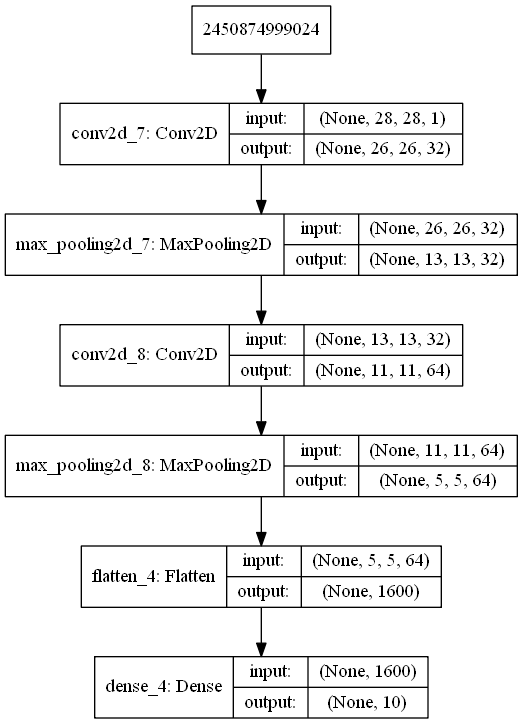

In [46]:
from PIL import Image #모델이 보이지 않을 경우

im = Image.open('model.png')
im

In [47]:
import time

class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In [58]:
time_callback = TimeHistory()
hist = model.fit(x_train, y_train,batch_size=128,epochs=5,verbose=1,validation_data=(x_test, y_test), callbacks=[time_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.0384 - acc: 0.9881 - val_loss: 0.0412 - val_acc: 0.9868
Epoch 2/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.0314 - acc: 0.9902 - val_loss: 0.0311 - val_acc: 0.9902
Epoch 3/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.0282 - acc: 0.9916 - val_loss: 0.0348 - val_acc: 0.9884
Epoch 4/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.0250 - acc: 0.9922 - val_loss: 0.0357 - val_acc: 0.9897
Epoch 5/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.0217 - acc: 0.9931 - val_loss: 0.0322 - val_acc: 0.9899


In [54]:
elsp_time = time_callback.times
print(elsp_time)

[3.9997122287750244, 3.8817808628082275]


In [55]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.036394908060180024
Test accuracy: 0.9879


In [56]:
import matplotlib.pyplot as plt

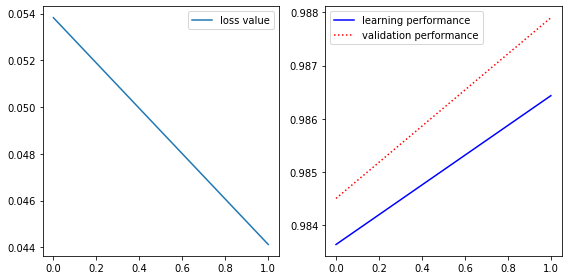

In [57]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label="loss value")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(hist.history['acc'], 'b-', label="learning performance")
plt.plot(hist.history['val_acc'], 'r:', label="validation performance")
plt.legend()
plt.tight_layout()
plt.show()